In [10]:
#範例 1
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 加載預訓練的VGG16模型，不包括頂層的全連接層
model = VGG16(weights='imagenet', include_top=True)
# 加載圖像（這裡以猫的圖片為例）
img_path = 'cat.jpg'
img = load_img(img_path, target_size=(224, 224))
# 將圖像轉換為numpy數組並進行預處理
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# 用VGG16進行預測
preds = model.predict(x)
# 解碼預測結果（將預測概率轉換為類別名稱）
print('Predicted:', decode_predictions(preds, top=3)[0])


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02123159', 'tiger_cat', 0.471615), ('n02124075', 'Egyptian_cat', 0.18742989), ('n02123045', 'tabby', 0.17165089)]


In [5]:
#z範例 2
# example of extending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark loaded layers as not trainable
for layer in model.layers:
	layer.trainable = False

# add new classifier layers
flat1 = Flatten()(model.output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [1]:
#範例 3
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
#from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
import cv2
import matplotlib.pyplot as plt

# 繪製線圖 (可將訓練時所傳回的損失值或準確率等歷史記錄繪製成線圖)
# history: 內含一或多筆要繪資料的字典, 例如：{'loss': [4,2,1,…], 'acc': [2,3,5,…]}
# keys: 以 tuple 或串列指定 history 中要繪製的 key 值, 例如：('loss', 'acc')
# title: 以字串指定圖表的標題文字
# xyLabel: 以 tuple 或串列指定 x, y 軸的說明文字, 例如：('epoch', 'Accuracy')
# ylim: 以 tuple 或串列指定 y 軸的最小值及最大值, 例如 (1, 3), 超出範圍的值會被忽略
# size: 以 tuple 指定圖的尺寸, 預設為 (6, 4) (即寬 6 高 4 英吋)
#匯入自訂的繪圖工具模組
def plot(history_dict, keys, title=None, xyLabel=[], ylim=(), size=()):
    lineType = ('-', '--', '.', ':')    # 線條的樣式, 畫多條線時會依序採用
    if len(ylim)==2: plt.ylim(*ylim)    # 設定 y 軸最小值及最大值
    if len(size)==2: plt.gcf().set_size_inches(*size)  # size預設為 (6,4)
    epochs = range(1, len(history_dict[keys[0]])+1)  # 計算有幾週期的資料
    for i in range(len(keys)):   # 走訪每一個 key (例如 'loss' 或 'acc' 等)
        plt.plot(epochs, history_dict[keys[i]], lineType[i])  # 畫出線條
    if title:   # 是否顯示標題欄
        plt.title(title)
    if len(xyLabel)==2:  # 是否顯示 x, y 軸的說明文字
        plt.xlabel(xyLabel[0])
        plt.ylabel(xyLabel[1])
    plt.legend(keys, loc='best') #upper left')  # 顯示圖例 (會以 key 為每條線的說明)
    plt.show()  # 顯示出畫好的圖


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_norm=[]#準備1000張訓練圖片
for i in range(1000):
  img = x_train[i]
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
  img = preprocess_input(img)
  x_train_norm.append(img)
x_train_norm = np.asarray(x_train_norm)

x_test_norm=[] #準備1000張測試圖片
for i in range(1000):
  img = x_test[i]
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
  img = preprocess_input(img)
  x_test_norm.append(img)
x_test_norm = np.asarray(x_test_norm)

# -- 將數字標籤進行 One-hot 編碼 -- #
# 進行 One-hot 編碼轉換...
y_train_onehot = utils.to_categorical(y_train[0:1000], 10) # 將訓練標籤進行 One-hot 編碼
y_test_onehot = utils.to_categorical(y_test[0:1000], 10)	 # 將測試標籤進行 One-hot 編碼
# End of Data --------------------------------------------------------------

# Method 2:  load model and specify a new input shape for images
new_input = Input(shape=(224, 224, 3))
model = VGG16(include_top=False, input_tensor=new_input )
# mark loaded layers as not trainable
for layer in model.layers:
  layer.trainable = False
# add new classifier layers
print("model.outputs.shap: ", model.output.shape)
flat1 = Flatten()(model.outputs[0])
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
model = Model(new_input, output)
model.summary()
# -- 神經網路的訓練配置 -- #
model.compile(loss='categorical_crossentropy',	# 損失函數
              optimizer='adam',	 # adam優化器
              metrics=['acc'])	 # 以準確度做為訓練指標
print("x_train_norm:", x_train_norm.shape)
print("x_test_norm:", x_test_norm.shape)
print("y_train_onehot:", y_train_onehot.shape)
print("y_test_onehot:", y_test_onehot.shape)

# -- 進行訓練 -- #
history = model.fit(x=x_train_norm,
	  		    y=y_train_onehot,
      		  batch_size=128,
      		  epochs=20,
      		  validation_split = 0.1
			    )



58889256/58889256 [==============================] - 1s 0us/step
model.outputs.shap:  (None, 7, 7, 512)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                       

NameError: name 'util3' is not defined

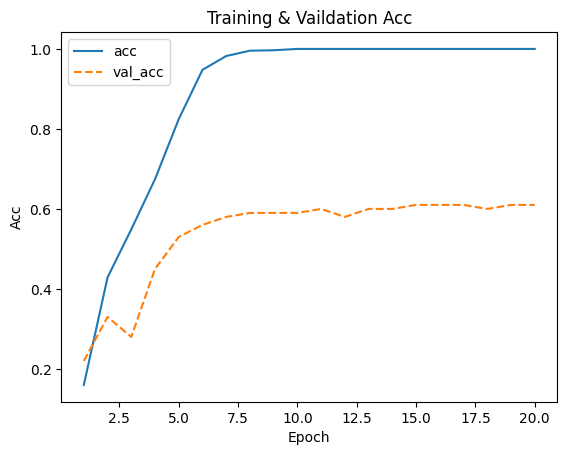

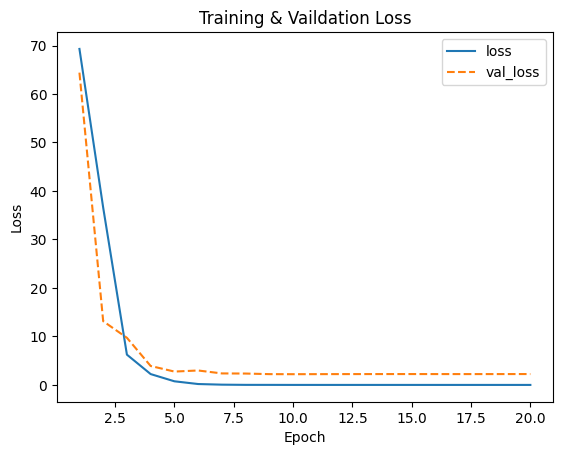

32/32 [==============================] - 12s 192ms/step - loss: 2.9237 - acc: 0.5340
測試資料損失值: 2.923699378967285
測試資料準確度: 0.5339999794960022


In [2]:
# --  繪製圖表 -- #

plot( history.history,   # 繪製準確率與驗證準確度的歷史線圖
        ('acc', 'val_acc'),
        'Training & Vaildation Acc',
        ('Epoch','Acc'),
        )

plot( history.history,   #  繪製損失及驗證損失的歷史線圖
        ('loss', 'val_loss'),
        'Training & Vaildation Loss',
        ('Epoch','Loss'),
        )
# -- 使用測試資料評估神經網路 -- #
test_loss, test_val = model.evaluate(x_test_norm, y_test_onehot)
print('測試資料損失值:', test_loss)
print('測試資料準確度:', test_val)

In [3]:
#範例 3
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
# load an image from file
image = load_img('dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))#batch =1
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
# get extracted features
features = model.predict(image)
print(features.shape)
# save to file
dump(features, open('dog.pkl', 'wb'))

1/1 [==============================] - 1s 1s/step
(1, 1000)


In [4]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>